#### Imports

In [33]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, Image
plt.style.use('ggplot')
params = {'legend.fontsize': '18',
          'axes.labelsize': '20',
          'axes.labelweight': 'bold',
          'axes.titlesize':'20',
          'xtick.labelsize':'18',
          'ytick.labelsize':'18'}
plt.rcParams.update(params)

#### Functions

In [36]:
def loss_lr(w, X, y):
    return np.sum(np.log(1 + np.exp(-y*(X@w))))

def loss_lr_grad(w, X, y):
    return -X.T @ (y/(1+np.exp(y*(X@w))))

def mk_fig():
    """
    Convenience function to plot figure canvas

    Returns
    -------
    fig, axes
        Figure and axes objects
    """
    fig, axes = plt.subplots(1, 1, figsize=(7, 7))
    axes.set_xlim(-1, 21)
    axes.set_ylim(-1.5, 1.5)
    axes.set_xlabel('x')
    axes.set_ylabel('y')

    return fig, axes

#### Data

In [113]:
np.random.seed(1)
x = np.concatenate((np.random.randint(0, 12, 10),
                    np.random.randint(8, 20, 10))
                  )
y = np.concatenate((np.ones((10,)) * -1,
                    np.ones(10,))
                  )

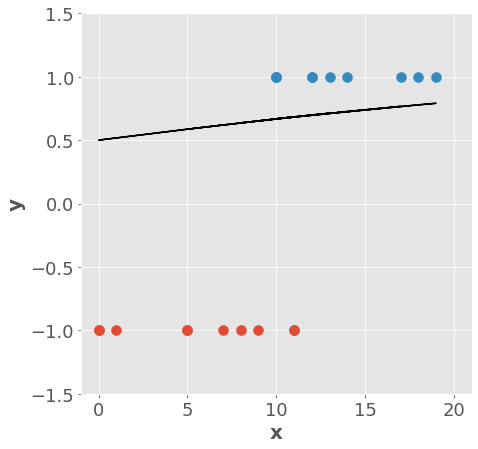

In [114]:
fig, axes = mk_fig()
mask = y == -1
colors = ['#E24A33', '#348ABD']

axes.scatter(x[mask], y[mask], s=100, label='Class 0', zorder=2)
axes.scatter(x[~mask], y[~mask], s=100, label='Class 1', zorder=2)

w0 = np.array([0])
w = minimize(lambda w: loss_lr(w, x[:, None], y), w0, jac=lambda w: loss_lr_grad(w, x[:, None], y)).x 
p = 1 / (1+np.exp(-w*x))
axes.plot(x, p, '-k')

In [115]:
from sklearn.linear_model import LogisticRegression

In [120]:
lr = LogisticRegression(C=1e8)
lr.fit(x[:, None], y);

In [121]:
lr.coef_

array([[0.9953184]])

In [122]:
lr.predict(x[:, None])

array([-1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
        1.,  1., -1.,  1.,  1.,  1., -1.])

In [123]:
lr.predict_proba(x[:, None])

array([[9.93534766e-01, 6.46523442e-03],
       [2.81490423e-01, 7.18509577e-01],
       [8.85833853e-01, 1.14166147e-01],
       [7.41457200e-01, 2.58542800e-01],
       [2.81490423e-01, 7.18509577e-01],
       [9.93534766e-01, 6.46523442e-03],
       [9.99955118e-01, 4.48823176e-05],
       [9.99955118e-01, 4.48823176e-05],
       [9.99878576e-01, 1.21423660e-04],
       [9.54531158e-01, 4.54688420e-02],
       [1.93972562e-02, 9.80602744e-01],
       [9.97768505e-04, 9.99002231e-01],
       [5.14555334e-01, 4.85444666e-01],
       [1.26485284e-01, 8.73514716e-01],
       [5.08002779e-02, 9.49199722e-01],
       [5.14555334e-01, 4.85444666e-01],
       [1.26485284e-01, 8.73514716e-01],
       [1.36421087e-04, 9.99863579e-01],
       [3.69013075e-04, 9.99630987e-01],
       [5.14555334e-01, 4.85444666e-01]])

#### Create and save animations

In [4]:
fig, axes = mk_fig()
mask = y == 0
colors = ['#E24A33', '#348ABD']

def init():
    axes.scatter(X[mask, 0], X[mask, 1], s=100, c='#E24A33', label='Class 0', zorder=2)
    axes.scatter(X[~mask, 0], X[~mask, 1], s=100, c='#348ABD', label='Class 1', zorder=2)
    axes.scatter(xq[0], xq[1], s=200, facecolor='None', edgecolor='k', lw=2, label='Unknown', zorder=2)
    axes.legend(facecolor='#F0F0F0', framealpha=1)

def animate(i):
    if i == 0:
        axes.scatter(xq[0], xq[1], s=200, facecolor='None', edgecolor='k', lw=2, label='Unknown', zorder=2)
    if i == 1:
        k = closest_node(xq, X, i)
        axes.plot([xq[0], X[k,0]],
                  [xq[1], X[k,1]],
                  'k-', zorder=1)
        axes.scatter(xq[0], xq[1]+0.01, s=200, facecolor=colors[y[k[0]]], edgecolor='k', lw=2, zorder=2)
    elif i % 2 == 1:
        k = closest_node(xq, X, i)
        axes.plot([np.repeat(xq[0], 2), X[k[-2:],0]],
                  [np.repeat(xq[1], 2), X[k[-2:],1]],
                  'k-', zorder=1)
        if sum(y[k] == 0) > sum(y[k] == 1):
            axes.scatter(xq[0], xq[1]+0.01, s=200, facecolor=colors[0], edgecolor='k', lw=2, zorder=2)
        elif sum(y[k] == 1) > sum(y[k] == 0):
            axes.scatter(xq[0], xq[1]+0.01, s=200, facecolor=colors[1], edgecolor='k', lw=2, zorder=2)
        else:  # if equal counts, set to closest point's color
            axes.scatter(xq[0], xq[1]+0.01, s=200, facecolor=colors[y[k[0]]], edgecolor='k', lw=2, zorder=2)
            
plt.close(fig)
ani = animation.FuncAnimation(fig,
                              animate,
                              init_func=init,
                              frames=10,
                              interval=600)
ani.save('../gif/knn/knn.gif', writer='imagemagick', fps=1, dpi=75)
# HTML(ani.to_jshtml())

#### View animations

In [ ]:
Image(url='../gif/knn/knn.gif')